In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Kuantisasi JPEG standar luminance (Y channel)
QUANTIZATION_MATRIX = np.array([
    [16,11,10,16,24,40,51,61],
    [12,12,14,19,26,58,60,55],
    [14,13,16,24,40,57,69,56],
    [14,17,22,29,51,87,80,62],
    [18,22,37,56,68,109,103,77],
    [24,35,55,64,81,104,113,92],
    [49,64,78,87,103,121,120,101],
    [72,92,95,98,112,100,103,99]
], dtype=np.float32)

# discrete cosine transform (DCT)
def dct_2d(block):
    return cv2.dct(block.astype(np.float32))

def idct_2d(block):
    return cv2.idct(block.astype(np.float32))

def plot_3d_barchart(block, title, ax):
    _x = np.arange(8)
    _y = np.arange(8)
    _xx, _yy = np.meshgrid(_x, _y)
    x, y = _xx.ravel(), _yy.ravel()
    z = np.zeros_like(x)
    dx = dy = 0.8
    dz = block.ravel()
    norm = plt.Normalize(0, 255)
    colors = cm.Greys(norm(dz))

    ax.bar3d(x, y, z, dx, dy, dz, shade=True, color=colors, edgecolor='gray')
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Intensitas')
    ax.set_zlim(0, 255)

image = cv2.imread('selfie.jpeg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

original_macroblock = gray_image[0:8, 0:8]

# Encoding
shifted_block = original_macroblock.astype(np.float32) - 128.0
dct_block = dct_2d(shifted_block)
quantized_block = np.round(dct_block / QUANTIZATION_MATRIX)

# Decoding
dequantized_block = quantized_block * QUANTIZATION_MATRIX
idct_block = idct_2d(dequantized_block)

decoded_macroblock = idct_block + 128.0
decoded_macroblock = np.clip(decoded_macroblock, 0, 255).astype(np.uint8)

print("Makroblok Asli (8x8):\n", original_macroblock)
print("\nMakroblok Hasil Decoding (8x8):\n", decoded_macroblock)

mse = np.mean((original_macroblock.astype(np.float32) - decoded_macroblock.astype(np.float32))**2)
print(f"\nMean Squared Error (MSE): {mse:.2f}")

Makroblok Asli (8x8):
 [[187 166 148 146 150 153 160 168]
 [187 167 149 144 146 150 157 166]
 [187 169 152 146 146 148 154 162]
 [190 174 157 149 148 149 153 158]
 [197 180 161 150 148 149 152 155]
 [204 188 167 152 146 147 151 154]
 [206 195 178 160 149 146 148 150]
 [204 199 188 170 155 147 146 146]]

Makroblok Hasil Decoding (8x8):
 [[188 170 149 140 146 157 163 164]
 [188 170 150 141 145 155 161 162]
 [188 172 153 142 144 151 156 158]
 [190 176 157 146 144 148 152 154]
 [194 181 164 150 145 146 149 151]
 [198 188 171 156 147 145 148 150]
 [202 193 178 162 150 145 147 150]
 [205 197 182 165 151 146 147 151]]

Mean Squared Error (MSE): 9.25


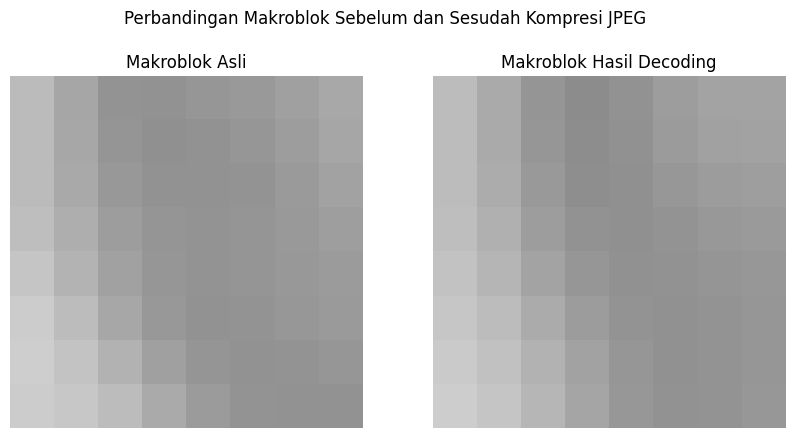

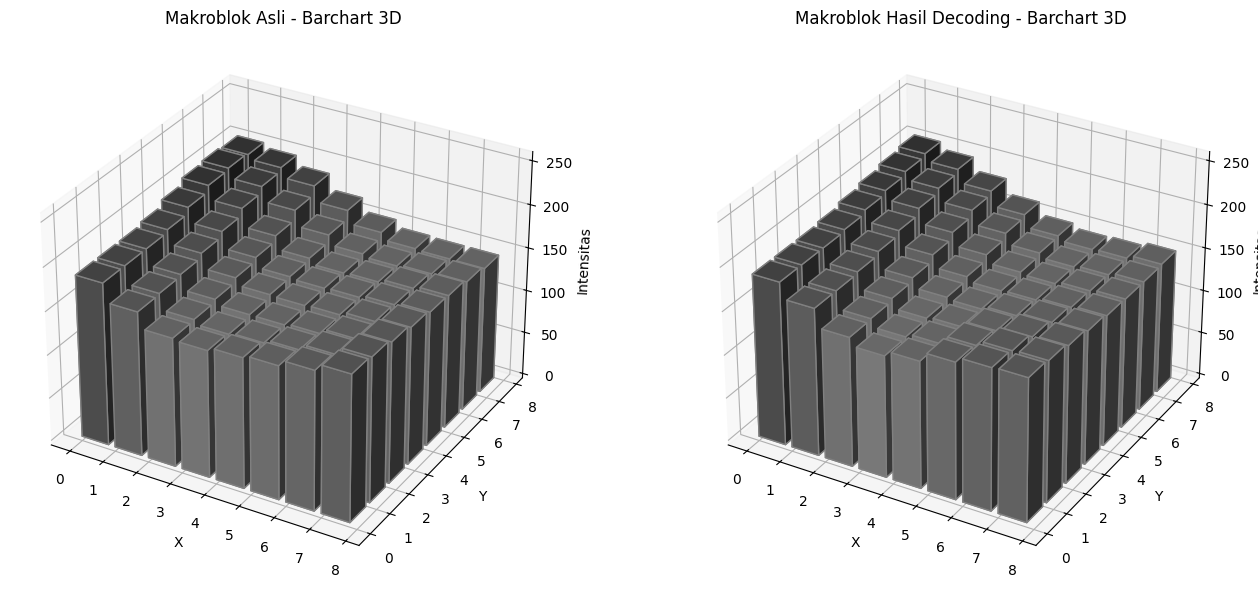

In [9]:
# Hasil
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(original_macroblock, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Makroblok Asli')
axs[0].axis('off')

axs[1].imshow(decoded_macroblock, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Makroblok Hasil Decoding')
axs[1].axis('off')

plt.suptitle('Perbandingan Makroblok Sebelum dan Sesudah Kompresi JPEG')
plt.show()

fig = plt.figure(figsize=(14, 6))

# Plot 3D blok asli
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
plot_3d_barchart(original_macroblock, 'Makroblok Asli - Barchart 3D', ax1)

# Hasil decoding
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
plot_3d_barchart(decoded_macroblock, 'Makroblok Hasil Decoding - Barchart 3D', ax2)

plt.tight_layout()
plt.show()